In [163]:
import numpy as np               # Array manipulation
import pandas as pd              # Data Manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns            # Statistical plotting

import os
import json
from pprint import pprint

In [164]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

In [165]:
def lineplot(x_data, y_data, xlabel, ylabel, legends, leg_title, title):
    # x_data.shape = N
    # y_data.shape = N x M
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(x_data, y_data, marker="D")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, legends, title=leg_title, fontsize=16, title_fontsize=20)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legends, loc = 'best', bbox_to_anchor=(1.1, 1.05))
    plt.show()

In [240]:
def str_to_dict(string):
    string = string.strip('{}')
    pairs = string.split(', ')
    return {key[1:-1]: float(value) for key, value in (pair.split(': ') for pair in pairs)}

def parse_log(log_file, dom_mode="S", job_mode="S"):
    lines = [x.strip("\n") for x in open(log_file, "r").readlines()]
    if job_mode == "S":
        if dom_mode == "S":
            acc_dom_str = "; Accuracy"
            met_dom_str = " Source: "
        else:
            acc_dom_str = "Target Accuracy"
            met_dom_str = " Target: "
    else:
        acc_dom_str = "; Accuracy"
        met_dom_str = " Target: "
    acc_lines = [x for x in lines if acc_dom_str in x]
    acc_vals = [float(x.split(" = ")[-1].replace("%","")) for x in acc_lines]
    met_lines = [str_to_dict(x.replace(met_dom_str, "")) for x in lines if met_dom_str in x]
    ent_vals = [x["Entropy"] for x in met_lines]
    nll_vals = [x["NLL"] for x in met_lines]
    ece_vals = [x["ECE"] for x in met_lines]
    bsc_vals = [x["BSC"] for x in met_lines]
    ret_dict = {
        "Ent": ent_vals,
        "NLL": nll_vals,
        "ECE": ece_vals,
        "Acc": acc_vals,
        "BSC": bsc_vals,
    }      
    return ret_dict

# LOG_FILE = "/coc/scratch/prithvi/dg_for_da/recognition_sfda/shot/vanilla_adafocal_g2/uda/VISDA-C/T/log.txt"
# pprint(parse_log(LOG_FILE, dom_mode="S"))
        
def plot_log_metrics(log_root, log_files, log_identifiers, metric="Acc", dom_mode="S", job_mode="S"):
    log_files = [os.path.join(log_root, x) for x in log_files]
    y_data = []
    for i in range(len(log_files)):
        log_data = parse_log(log_files[i], dom_mode, job_mode)
        y_data.append(log_data[metric])
    y_data = np.array(y_data).T
    print(y_data.shape)
    x_data = [x + 1 for x in range(y_data.shape[0])]
#     if job_mode == "T":
#         dom_mode = "T"
    lineplot(x_data, y_data, "Epochs", metric, log_identifiers, "Methods", dom_mode + " " + metric + " Across Epochs")

In [242]:
LOG_ROOT = "/coc/scratch/prithvi/dg_for_da/recognition_sfda/shot/"
LOG_FILES = [
    "vanilla/uda/VISDA-C/T/log.txt",
    "vanilla_adafocal_g2/uda/VISDA-C/T/log.txt",
    "vanilla_adafocal_g0.5/uda/VISDA-C/T/log.txt",
    "pasta_a3k2b025/uda/VISDA-C/T/log.txt",
    "pasta_a3k2b025_adafocal_g2/uda/VISDA-C/T/log.txt",
    "pasta_a3k2b025_adafocal_g05/uda/VISDA-C/T/log.txt",
    "pasta_a10k1b05/uda/VISDA-C/T/log.txt",
    "pasta_a10k1b05_adafocal_g2/uda/VISDA-C/T/log.txt",
    "pasta_a10k1b05_adafocal_g05/uda/VISDA-C/T/log.txt",
]
LOG_IDS = [
    "vanilla",
    "vanilla_adafocal_g2",
    "vanilla_adafocal_g0.5",
    "pasta_a3k2b025",
    "pasta_a3k2b025_adafocal_g2",
    "pasta_a3k2b025_adafocal_g0.5",
    "pasta_a10k1b05",
    "pasta_a10k1b05_adafocal_g2",
    "pasta_a10k1b05_adafocal_g0.5",
]

S Acc
(10, 9)


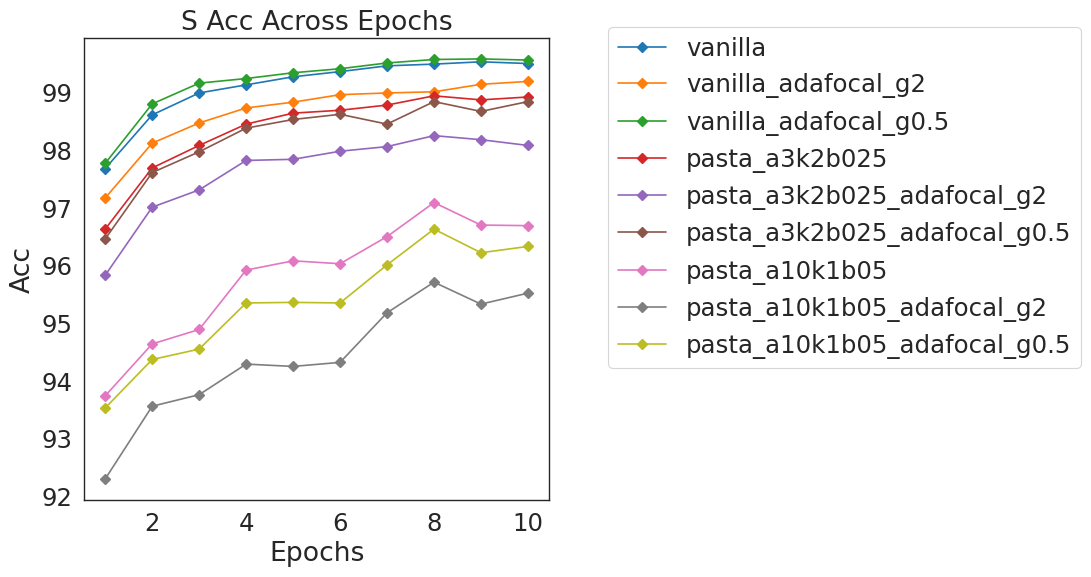

T Acc
(10, 9)


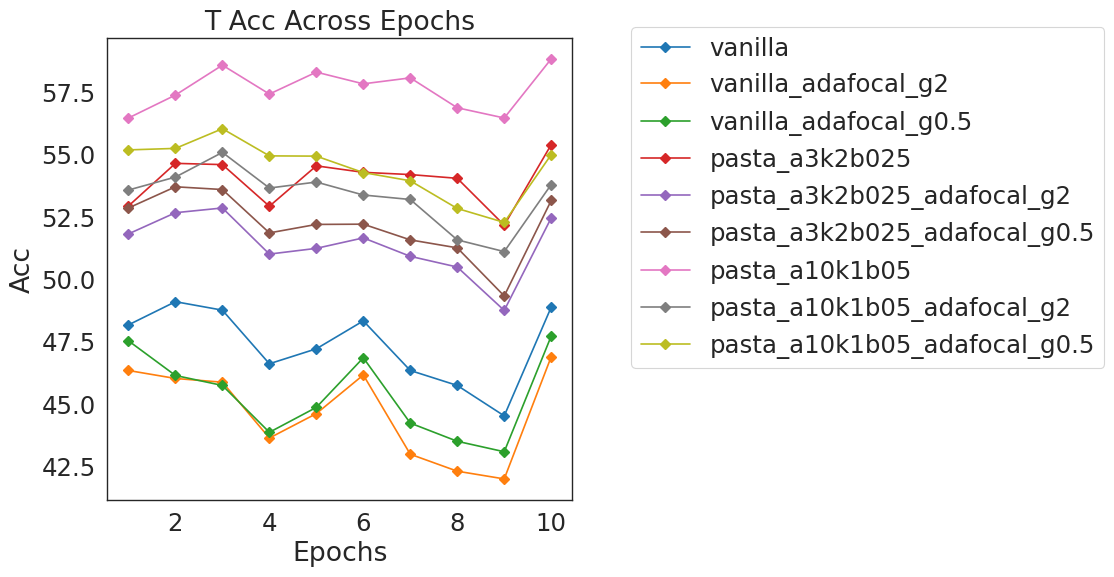

In [244]:
METRIC = "Acc"
DOM_MODE = "S"
for DOM_MODE in ["S", "T"]:
    print(DOM_MODE + " " + METRIC)
    plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE)

S ECE
(10, 9)


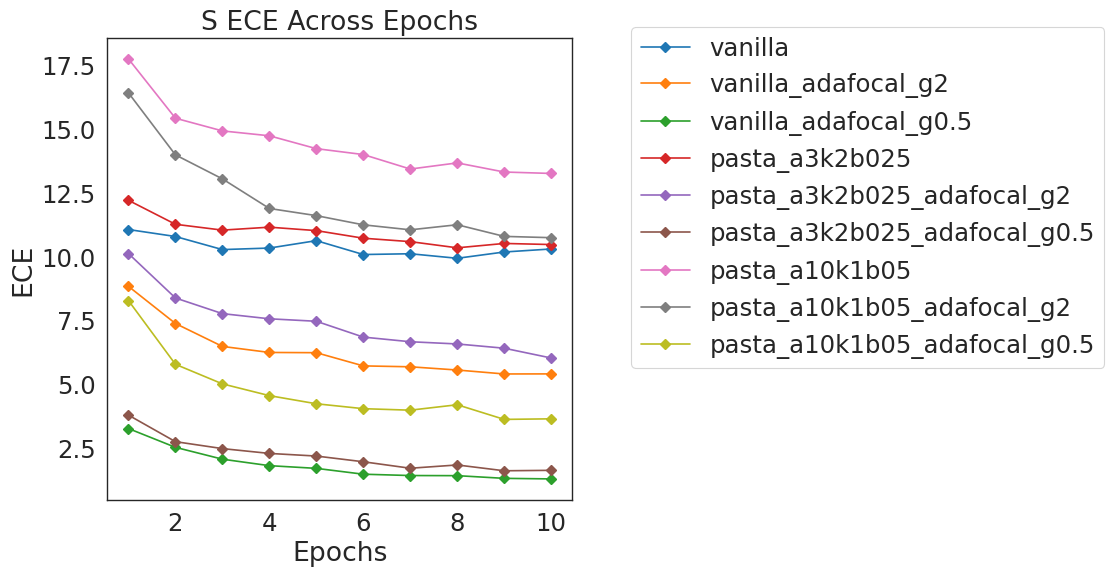

T ECE
(10, 9)


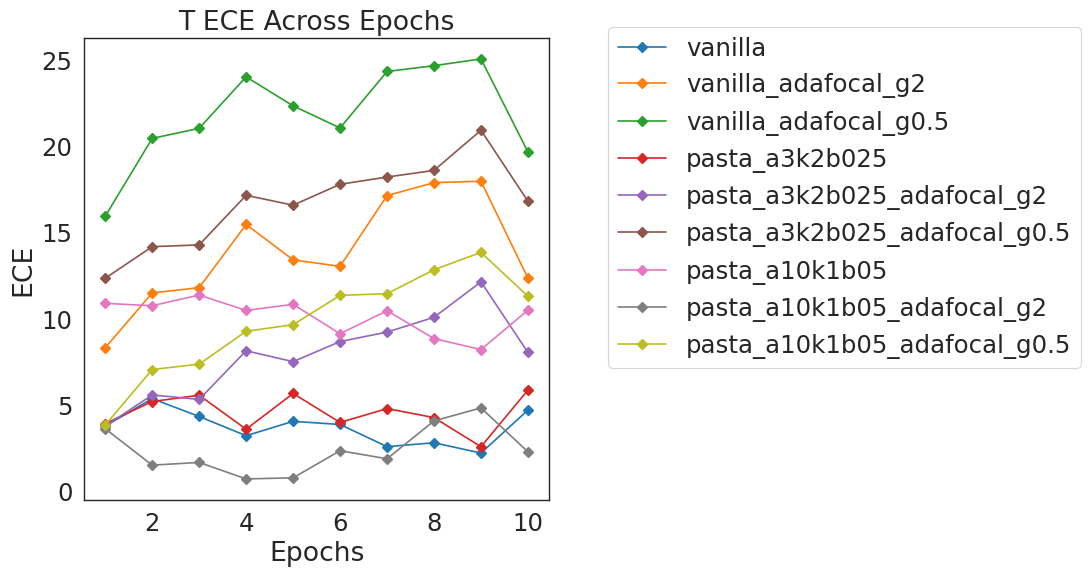

In [245]:
METRIC = "ECE"
DOM_MODE = "S"
for DOM_MODE in ["S", "T"]:
    print(DOM_MODE + " " + METRIC)
    plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE)

S Ent
(10, 9)


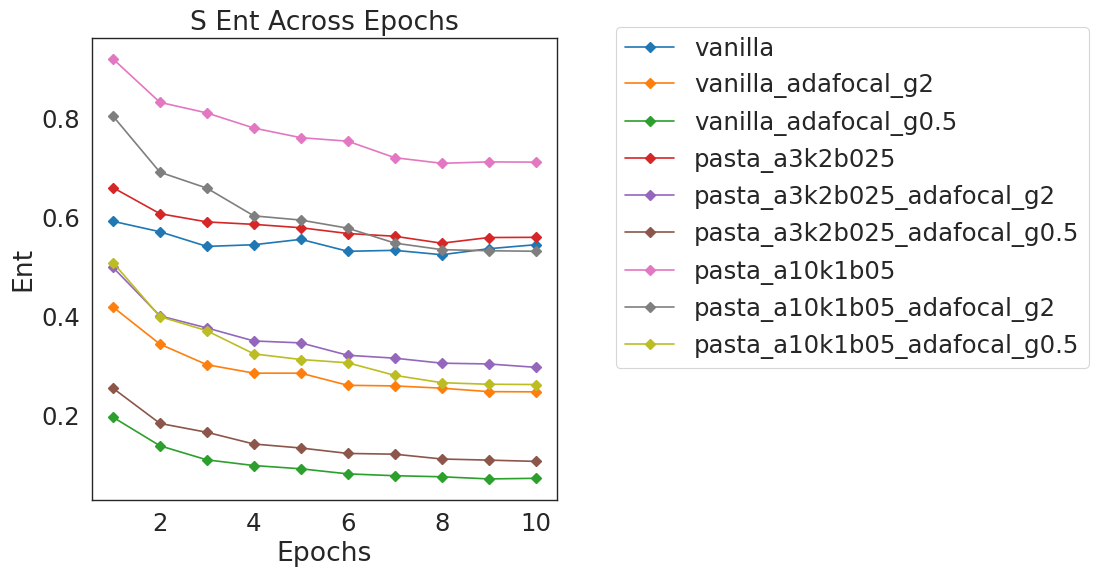

T Ent
(10, 9)


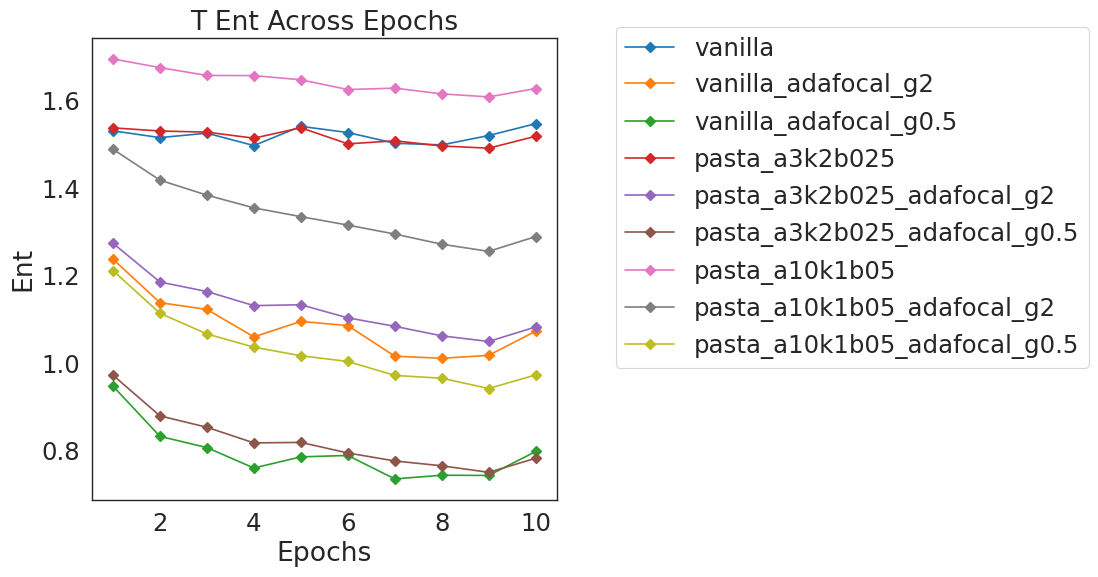

In [246]:
METRIC = "Ent"
DOM_MODE = "S"
for DOM_MODE in ["S", "T"]:
    print(DOM_MODE + " " + METRIC)
    plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE)

S NLL
(10, 9)


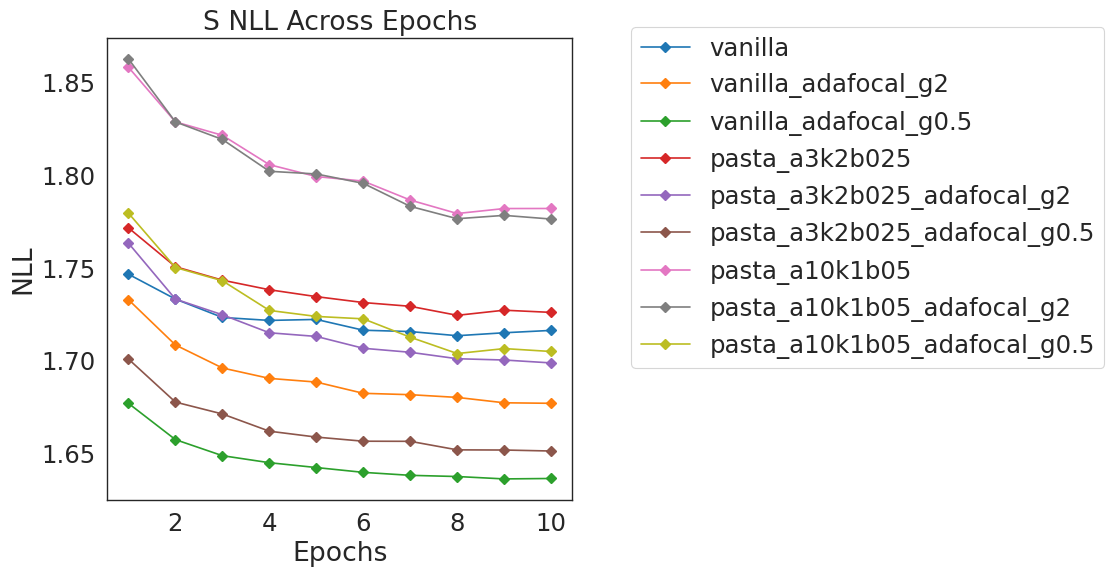

T NLL
(10, 9)


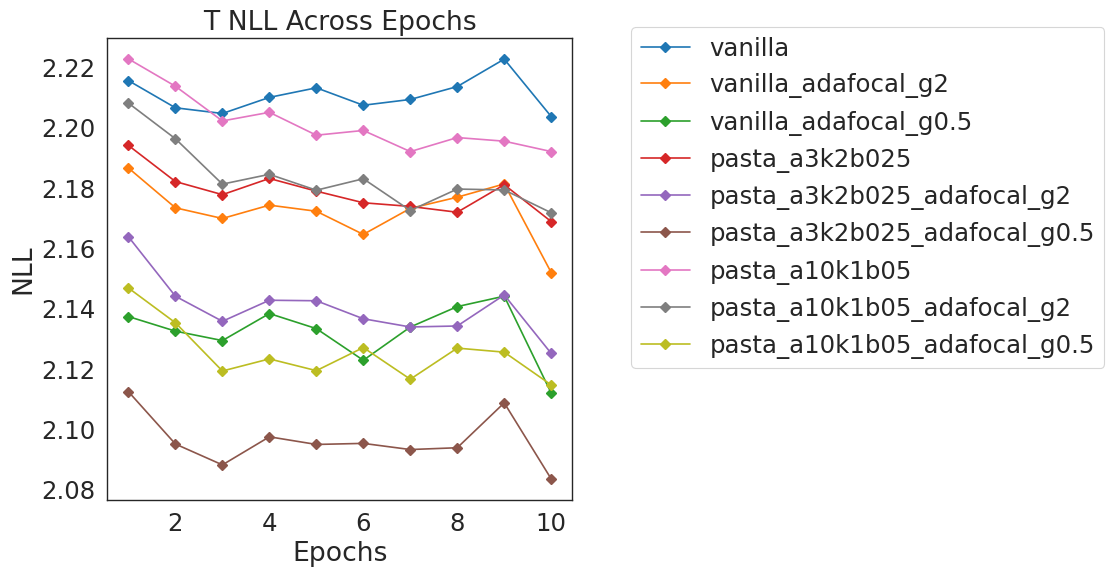

In [247]:
METRIC = "NLL"
DOM_MODE = "S"
for DOM_MODE in ["S", "T"]:
    print(DOM_MODE + " " + METRIC)
    plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE)

S BSC
(10, 9)


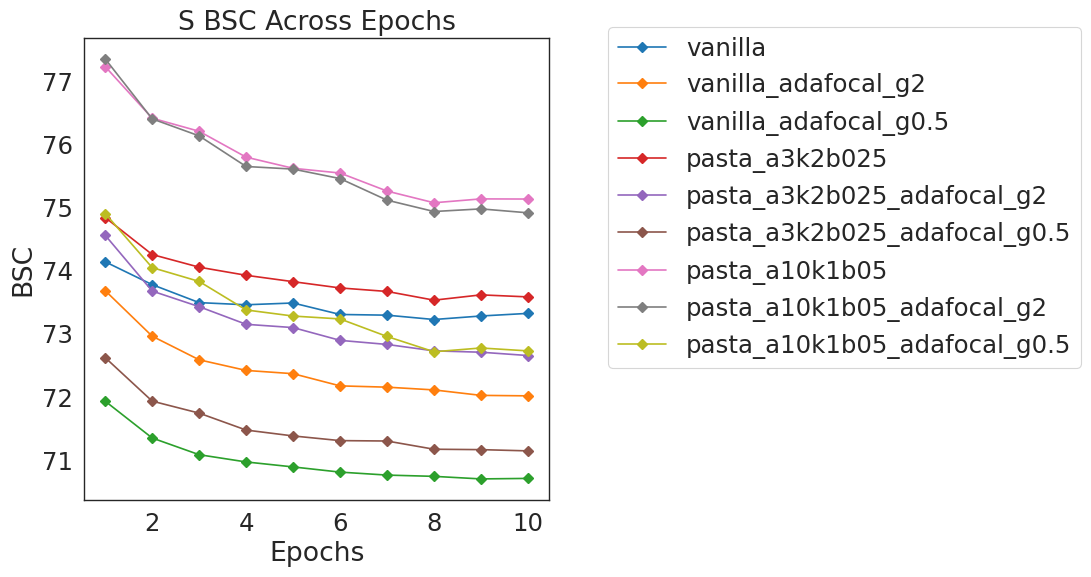

T BSC
(10, 9)


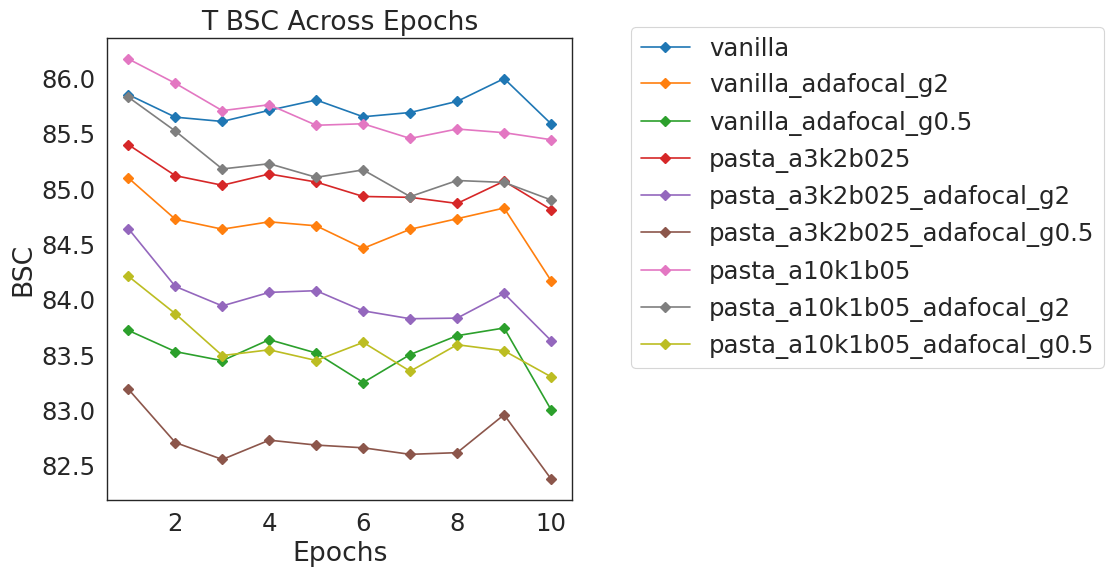

In [248]:
METRIC = "BSC"
DOM_MODE = "S"
for DOM_MODE in ["S", "T"]:
    print(DOM_MODE + " " + METRIC)
    plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE)

In [249]:
LOG_ROOT = "/coc/scratch/prithvi/dg_for_da/recognition_sfda/shot/"
LOG_FILES = [
    "vanilla_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
    "vanilla_adafocal_g2_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
    "vanilla_adafocal_g0.5_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
    "pasta_a3k2b025_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
    "pasta_a3k2b025_adafocal_g2_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
    "pasta_a3k2b025_adafocal_g05_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
    "pasta_a10k1b05_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
    "pasta_a10k1b05_adafocal_g2_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
    "pasta_a10k1b05_adafocal_g05_adapt/uda/VISDA-C/TV/log_par_0.3.txt",
]
LOG_IDS = [
    "vanilla_adapt",
    "vanilla_adafocal_g2_adapt",
    "vanilla_adafocal_g0.5_adapt",
    "pasta_a3k2b025_adapt",
    "pasta_a3k2b025_adafocal_g2_adapt",
    "pasta_a3k2b025_adafocal_g0.5_adapt",
    "pasta_a10k1b05_adapt",
    "pasta_a10k1b05_adafocal_g2_adapt",
    "pasta_a10k1b05_adafocal_g0.5_adapt",
]

T Acc
(15, 9)


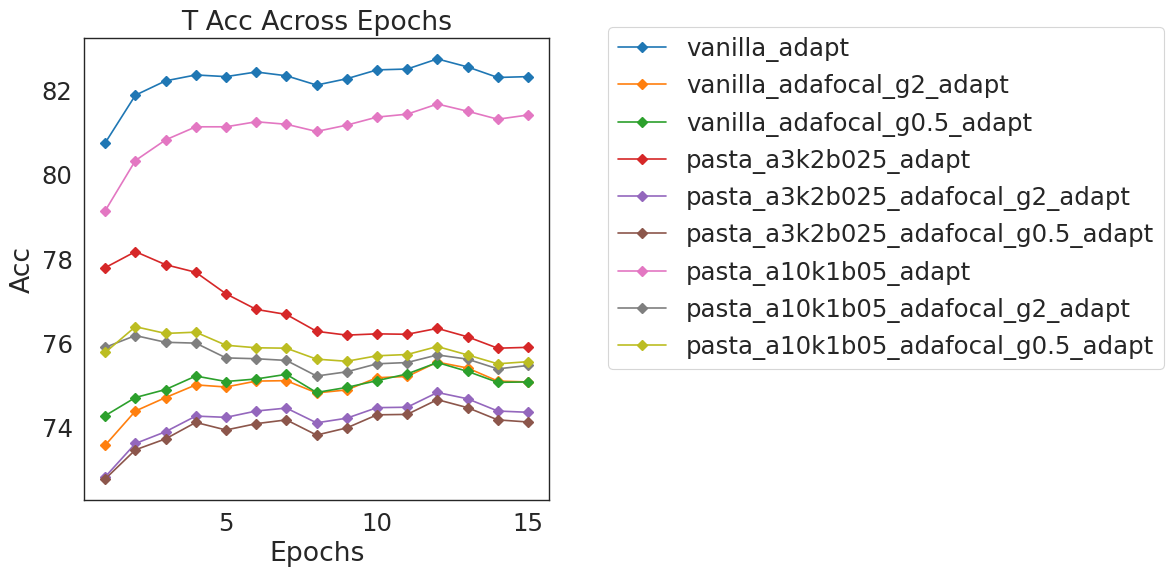

In [250]:
METRIC = "Acc"
DOM_MODE = "T"
print(DOM_MODE + " " + METRIC)
plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE, job_mode="T")

T ECE
(15, 9)


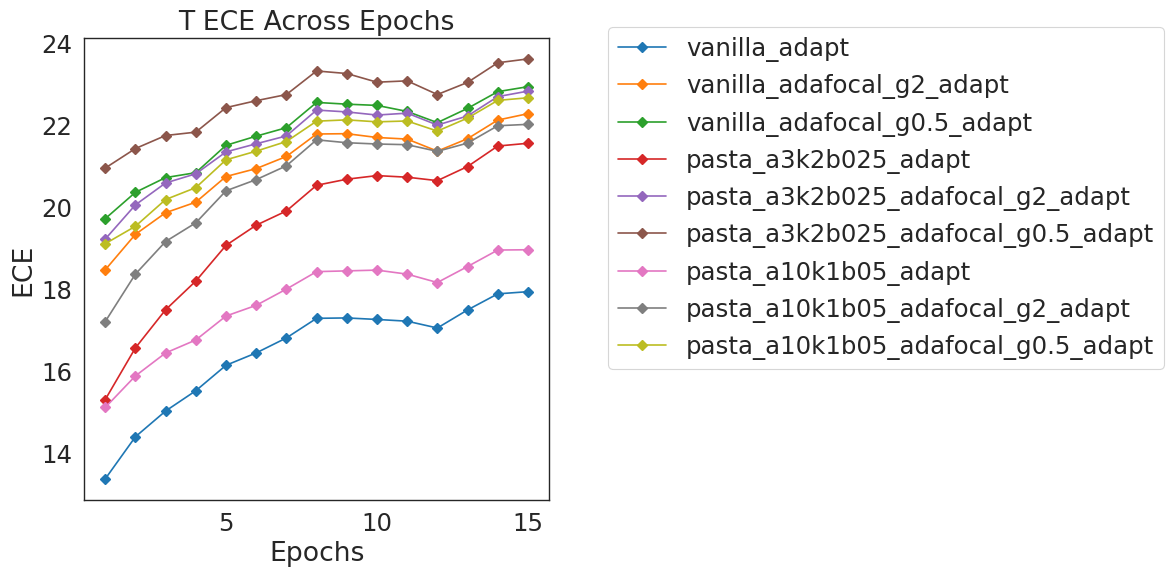

In [255]:
METRIC = "ECE"
DOM_MODE = "T"
print(DOM_MODE + " " + METRIC)
plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE,job_mode="T")

T Ent
(15, 9)


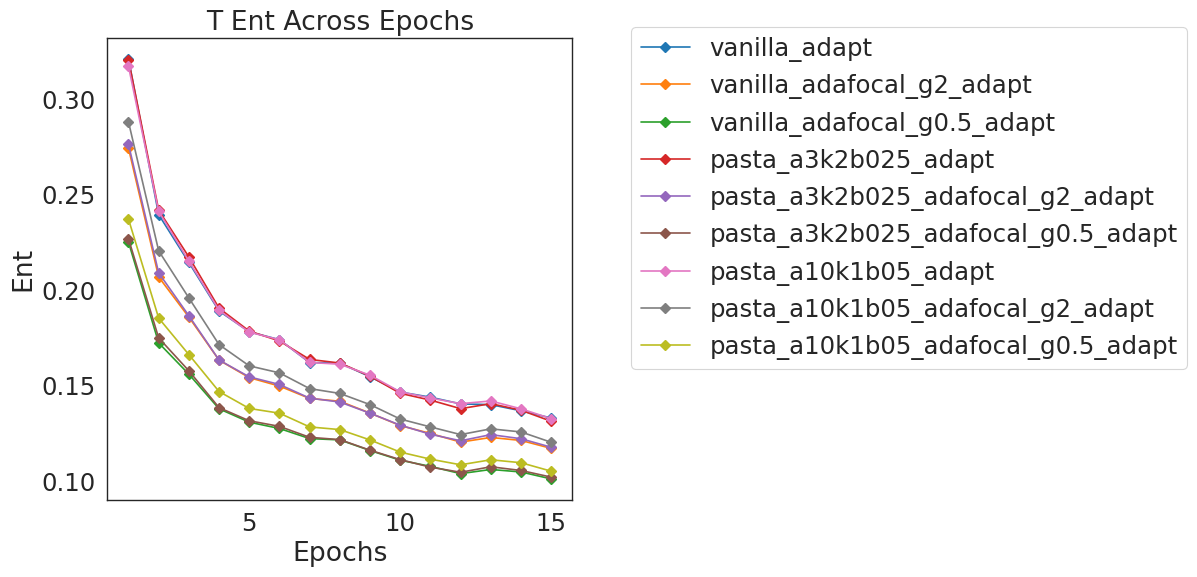

In [256]:
METRIC = "Ent"
DOM_MODE = "T"
print(DOM_MODE + " " + METRIC)
plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE,job_mode="T")

T NLL
(15, 9)


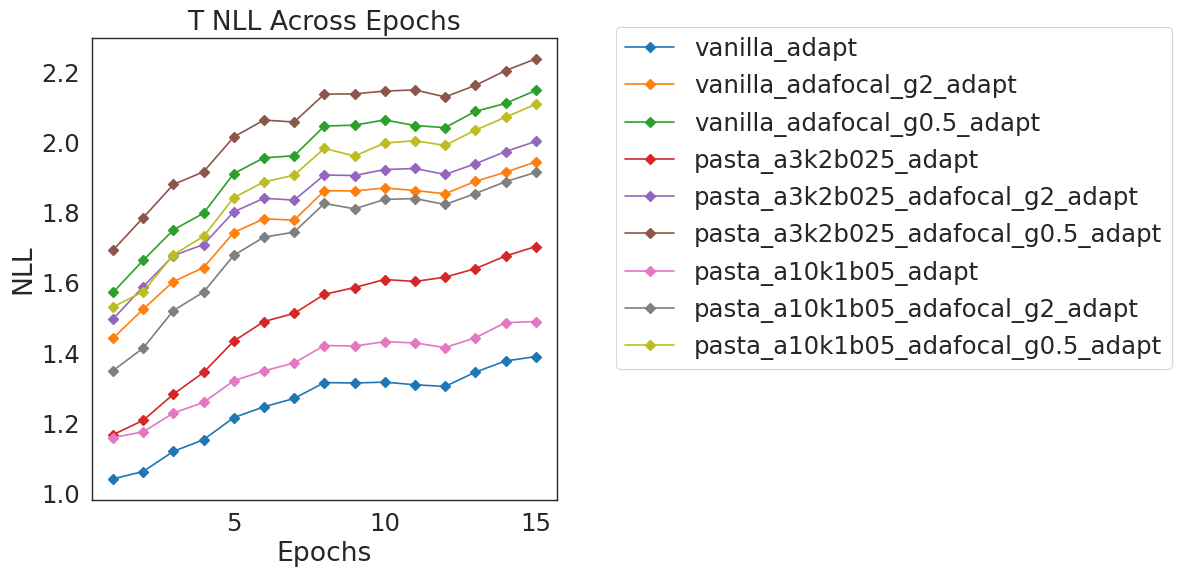

In [257]:
METRIC = "NLL"
DOM_MODE = "T"
print(DOM_MODE + " " + METRIC)
plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE,job_mode="T")

T BSC
(15, 9)


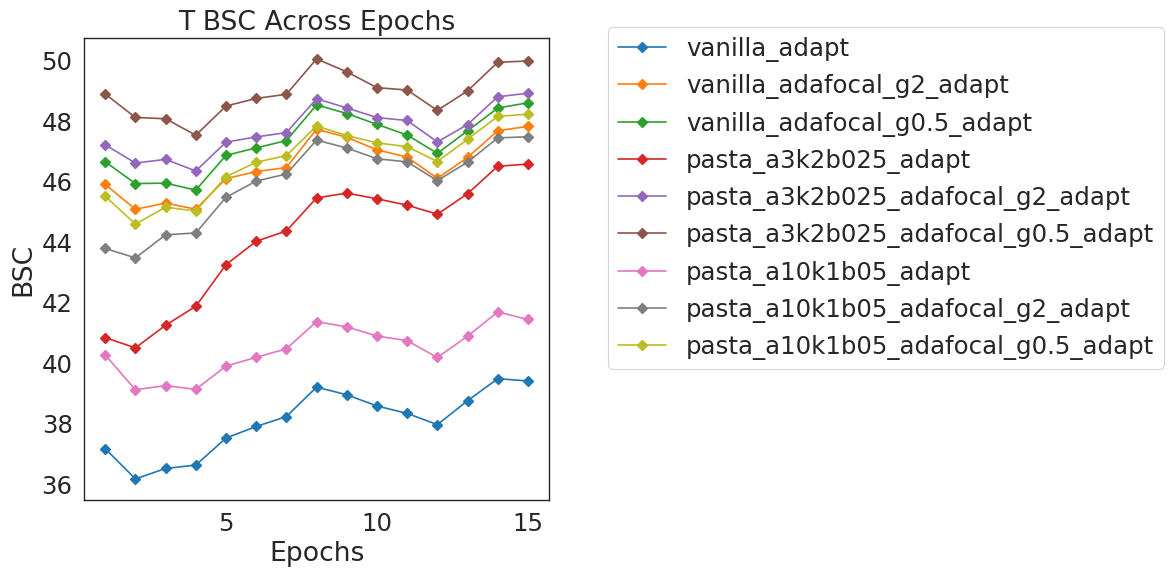

In [258]:
METRIC = "BSC"
DOM_MODE = "T"
print(DOM_MODE + " " + METRIC)
plot_log_metrics(LOG_ROOT, LOG_FILES, LOG_IDS, METRIC, dom_mode=DOM_MODE,job_mode="T")